<a href="https://colab.research.google.com/github/Prakhar021-hub/Deep-Learning-Notebooks/blob/main/weights_initialization_using_sigmoid_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [43]:
# Generate the moon dataset
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Convert to a DataFrame
df = pd.DataFrame(X, columns=['X', 'Y'])
df['class'] = y

# Display the first 5 rows in the desired format
print(df.head().to_string(index=True))

          X         Y  class
0 -1.049426  0.084443      0
1  0.922818  0.457489      0
2  0.656787  0.699597      0
3  1.188940 -0.386528      1
4  0.289265 -0.137745      1


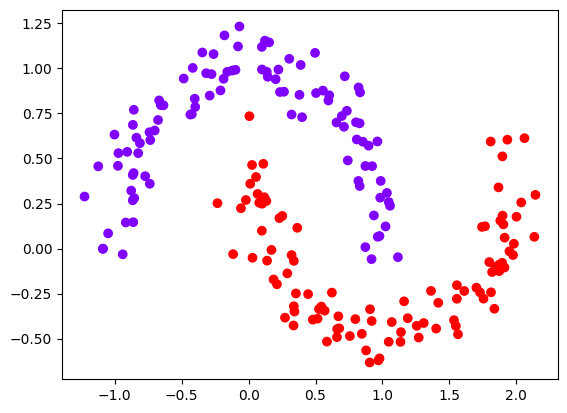

In [44]:
plt.scatter(df['X'], df['Y'], c=df["class"], cmap='rainbow')
plt.show()

In [45]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [46]:
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.get_weights()

[array([[ 1.0273    , -0.51845473],
        [ 0.86869156,  0.34826016]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.02216792],
        [1.1581019 ]], dtype=float32),
 array([0.], dtype=float32)]

In [48]:
initial_weights = model.get_weights()

In [49]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.])]

In [50]:
model.set_weights(initial_weights)

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])

In [52]:
history = model.fit(X, y, epochs=50, validation_split=0.2)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5263 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6935
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4642 - loss: 0.6934 - val_accuracy: 0.4500 - val_loss: 0.6934
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4742 - loss: 0.6933 - val_accuracy: 0.4500 - val_loss: 0.6935
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6936
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5293 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6937
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5567 - loss: 0.6925 - val_accuracy: 0.4500 - val_loss: 0.6938
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5332 - loss: 0.6927 - val_accuracy: 0.4500 - val_loss: 0.6939
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5102 - loss: 0.6930 - val_accuracy: 0.4500 - val_loss: 0.6939


In [53]:
model.get_weights()

[array([[-0.37333494, -0.37333494],
        [ 0.3870592 ,  0.3870592 ]], dtype=float32),
 array([0.00531246, 0.00531246], dtype=float32),
 array([[-0.09899084],
        [-0.09899084]], dtype=float32),
 array([-0.00650913], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

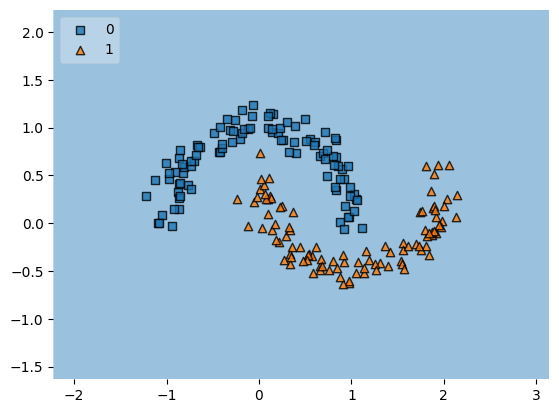

In [54]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

**Using the sigmoid activation function and initializing all weights to zero will create a model that cannot learn effectively. During backpropagation, all neurons will receive the same gradients, leading to identical weight updates. This symmetry prevents the model from learning distinct features, and the weights may remain stuck or learn very slowly, ultimately resulting in a model that fails to train properly  {in other words even if we add 100 or 1000 neurons in the hidden layer they will act as a single perceptron}**